**Importing All Libraries**

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
import random
import string
from keras.preprocessing.sequence import pad_sequences

In [2]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:00


**Generating a dataset of 1000 plain text and cipher pairs to be used as training data**

In [3]:
import random
import string
import csv
from faker import Faker

def generate_random_word(length):
    """Generates a random word of the specified length."""
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))

def generate_caesar_cipher(plaintext, shift):
    """Generates a Caesar cipher ciphertext from the given plaintext and shift."""
    ciphertext = ""
    for character in plaintext:
        if character.isalpha():  # Check if the character is a letter
            new_character = ord(character) + shift
            if character.islower():
                if new_character > ord('z'):
                    new_character -= 26
            else:
                if new_character > ord('Z'):
                    new_character -= 26
            ciphertext += chr(new_character)
        else:
            # Keep non-alphabetic characters unchanged
            ciphertext += character
    return ciphertext

fake = Faker()

# Generate a dataset of 1000 plaintext-ciphertext pairs
dataset = []
for i in range(5000):
    plaintext = fake.sentence()
    shift = random.randint(1, 25)
    ciphertext = generate_caesar_cipher(plaintext, shift)
    dataset.append((plaintext, ciphertext))

# Save the dataset to a CSV file
with open('caesar_cipher_dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(dataset)
print(dataset)


[('Also commercial current huge.', 'Sdkg ugeewjuasd umjjwfl zmyw.'), ('Able cold green system hot base sound.', 'Klvo myvn qboox cicdow ryd lkco cyexn.'), ('Gas board concern machine clear.', 'Sme namdp oazoqdz ymotuzq oxqmd.'), ('Material paper tend better.', 'Vjcnarju yjyna cnwm knccna.'), ('Father one task.', 'Vqjxuh edu jqia.'), ('Not trial opportunity away.', 'Cdi igxpa deedgijcxin plpn.'), ('Rise or country enjoy participant kind school possible.', 'Fwgs cf qcibhfm sbxcm dofhwqwdobh ywbr gqvccz dcggwpzs.'), ('Ago stay bed choose wonder.', 'Lrz delj mpo nszzdp hzyopc.'), ('Yes take know sister.', 'Vbp qxhb hklt pfpqbo.'), ('Three former report both clear reality run step.', 'Cqann oxavna anyxac kxcq lunja anjurch adw bcny.'), ('Water drive experience pass plant.', 'Imfqd pduhq qjbqduqzoq bmee bxmzf.'), ('Artist order since surface imagine expert.', 'Ctvkuv qtfgt ukpeg uwthceg kocikpg gzrgtv.'), ('Perform true majority nation service scene before.', 'Shuirup wuxh pdmrulwb qdwlrq vh

**Data Preprocessing**

In [4]:
# Load the plaintext-ciphertext dataset
dataset = np.loadtxt('caesar_cipher_dataset.csv', delimiter=',', dtype=str)
plaintext = dataset[:, 0]
ciphertext = dataset[:, 1]

In [5]:
# Tokenize the plaintext and ciphertext
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(plaintext)
plaintext_sequences = tokenizer.texts_to_sequences(plaintext)
ciphertext_sequences = tokenizer.texts_to_sequences(ciphertext)
print(plaintext_sequences)
print(ciphertext_sequences)

[[5, 10, 9, 6, 1, 11, 6, 16, 16, 2, 4, 11, 7, 5, 10, 1, 11, 14, 4, 4, 2, 8, 3, 1, 15, 14, 18, 2, 13], [5, 23, 10, 2, 1, 11, 6, 10, 12, 1, 18, 4, 2, 2, 8, 1, 9, 19, 9, 3, 2, 16, 1, 15, 6, 3, 1, 23, 5, 9, 2, 1, 9, 6, 14, 8, 12, 13], [18, 5, 9, 1, 23, 6, 5, 4, 12, 1, 11, 6, 8, 11, 2, 4, 8, 1, 16, 5, 11, 15, 7, 8, 2, 1, 11, 10, 2, 5, 4, 13], [16, 5, 3, 2, 4, 7, 5, 10, 1, 17, 5, 17, 2, 4, 1, 3, 2, 8, 12, 1, 23, 2, 3, 3, 2, 4, 13], [20, 5, 3, 15, 2, 4, 1, 6, 8, 2, 1, 3, 5, 9, 24, 13], [8, 6, 3, 1, 3, 4, 7, 5, 10, 1, 6, 17, 17, 6, 4, 3, 14, 8, 7, 3, 19, 1, 5, 21, 5, 19, 13], [4, 7, 9, 2, 1, 6, 4, 1, 11, 6, 14, 8, 3, 4, 19, 1, 2, 8, 26, 6, 19, 1, 17, 5, 4, 3, 7, 11, 7, 17, 5, 8, 3, 1, 24, 7, 8, 12, 1, 9, 11, 15, 6, 6, 10, 1, 17, 6, 9, 9, 7, 23, 10, 2, 13], [5, 18, 6, 1, 9, 3, 5, 19, 1, 23, 2, 12, 1, 11, 15, 6, 6, 9, 2, 1, 21, 6, 8, 12, 2, 4, 13], [19, 2, 9, 1, 3, 5, 24, 2, 1, 24, 8, 6, 21, 1, 9, 7, 9, 3, 2, 4, 13], [3, 15, 4, 2, 2, 1, 20, 6, 4, 16, 2, 4, 1, 4, 2, 17, 6, 4, 3, 1, 23, 6, 3, 15, 

In [6]:
# Pad the sequences to the same length
max_length = max(len(sequence) for sequence in ciphertext_sequences)
plaintext_sequences = pad_sequences(plaintext_sequences,   padding='post')
ciphertext_sequences = pad_sequences(ciphertext_sequences,   padding='post')

In [7]:
print(len(tokenizer.word_index) + 1)

29


In [8]:
print(ciphertext_sequences.shape)

(5000, 72)


**Building the stacked LSTM model with a custom attention layer for accelerated performance**

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, BatchNormalization, Dropout, Input, Lambda

# Input shapes for ciphertext and plaintext sequences
ciphertext_input = Input(shape=(7, 256))  # Replace with your actual shapes
plaintext_input = Input(shape=(7, 256))

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=None))

# Add LSTM layer for ciphertext sequences
model.add(LSTM(100, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Implement custom attention mechanism using Lambda
def attention(x):
    # Perform attention within the Lambda layer
    return x

# Apply custom attention mechanism within LSTM
model.add(LSTM(200, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', use_bias=True))
model.add(Lambda(attention))
model.add(LSTM(300, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', use_bias=True))

model.add(BatchNormalization())
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         7424      
                                                                 
 lstm_3 (LSTM)               (None, None, 100)         142800    
                                                                 
 batch_normalization_2 (Bat  (None, None, 100)         400       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_4 (LSTM)               (None, None, 200)         240800    
                                                                 
 lambda_1 (Lambda)           (None, None, 200)         0         
                                                      

**Using and building a sequence to sequence loss**

In [11]:
from keras.losses import Loss
from keras import backend as K

class SequenceToSequenceLoss(Loss):
    def __init__(self, name='sequence_to_sequence_loss'):
        super().__init__(name=name)

    def call(self, y_true, y_pred):
        # Calculate sequence-to-sequence loss
        loss = K.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
        return loss

# Create an instance of the custom loss
sequence_to_sequence_loss = SequenceToSequenceLoss()

# Compile the model with the custom loss function
model.compile(loss=sequence_to_sequence_loss, optimizer='adam', metrics=['accuracy'])


**Model Training**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 6/25 [======>.......................] - ETA: 1s - loss: 2.3950 - accuracy: 0.3984

25/25 [==============================] - 10s 54ms/step - loss: 1.7322 - accuracy: 0.5264
Epoch 2/100
25/25 [==============================] - 1s 49ms/step - loss: 1.3693 - accuracy: 0.6123
Epoch 3/100
25/25 [==============================] - 1s 49ms/step - loss: 1.2092 - accuracy: 0.6395
Epoch 4/100
25/25 [==============================] - 1s 48ms/step - loss: 1.1846 - accuracy: 0.6421
Epoch 5/100
25/25 [==============================] - 1s 49ms/step - loss: 1.1789 - accuracy: 0.6429
Epoch 6/100
25/25 [==============================] - 1s 49ms/step - loss: 1.1759 - accuracy: 0.6437
Epoch 7/100
25/25 [==============================] - 1s 51ms/step - loss: 1.1739 - accuracy: 0.6437
Epoch 8/100
25/25 [==============================] - 1s 56ms/step - loss: 1.1715 - accuracy: 0.6443
Epoch 9/100
25/25 [==============================] - 1s 53ms/step - loss: 1.1706 - accuracy: 0.6438
Epoch 10/100
25/25 [==============================] - 1s 51ms/step - loss: 1.1686 - accuracy: 0.6444
Epoch 11/1

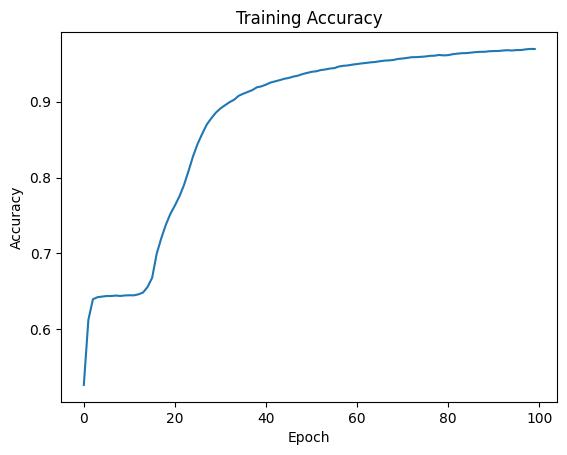

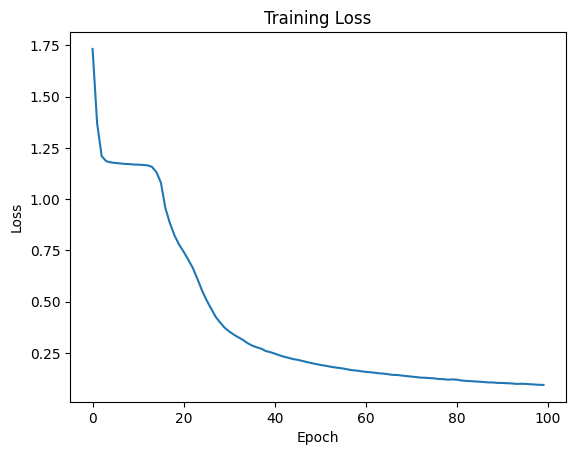

In [12]:
import matplotlib.pyplot as plt
import keras

# Define a callback to collect metrics during training
class MetricsCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics = {'loss': [], 'accuracy': []}

    def on_epoch_end(self, epoch, logs={}):
        self.metrics['loss'].append(logs.get('loss'))
        self.metrics['accuracy'].append(logs.get('accuracy'))

# Create an instance of the callback
metrics_callback = MetricsCallback()

# Train the model with the callback
model.fit(ciphertext_sequences, np.expand_dims(plaintext_sequences, -1), batch_size=128, epochs=100, callbacks=[metrics_callback])

# Access collected metrics
loss = metrics_callback.metrics['loss']
accuracy = metrics_callback.metrics['accuracy']

# Plot training accuracy and loss
plt.plot(accuracy)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


**Saving the model for deploying in a real valued application**

In [13]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/models/lstm_cipher_model.h5')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Testing with actual sentences and random keys along with evaluating Key metrics**

---



In [19]:
#DQ DSSOH D GDB NHHSV WKH GRFWRU DZDB

#actual thing :As the asteroid hurtled toward earth, Becky was upset her dentist appointment had been canceled.
input_plaintext = "DV WKH DVWHURLG KXUWOHG WRZDUG HDUWK, EHFNB ZDV XSVHW KHU GHQWLVW DSSRLQWPHQW KDG EHHQ FDQFHOHG."
input_sequence = tokenizer.texts_to_sequences([input_plaintext])
print(input_sequence)
input_sequence = pad_sequences(input_sequence, padding='post')
decoded_predictions = []
predictions = model.predict(input_sequence)
print(predictions.shape)
# for prediction in predictions:
#     decoded_text = ''
#     for char_probabilities in prediction:
#         predicted_index = np.argmax(char_probabilities)
#         decoded_char = tokenizer.index_word.get(predicted_index, ' ')  # Use a space as a default character
#         decoded_text += decoded_char
#     decoded_predictions.append(decoded_text)

# print('Predicted plaintext:', decoded_predictions)
# Assuming predictions has shape (1, 3, 28)
decoded_predictions = []

for prediction in predictions[0]:  # Iterate over the sequence positions
    word_index = np.argmax(prediction)  # Find the word index with the highest probability
    word = tokenizer.index_word[word_index]  # Convert the index back to a word
    decoded_predictions.append(word)

plaintext = ' '.join(decoded_predictions)
print("REAL TEXT with key 3: As the asteroid hurtled toward earth, Becky was upset her dentist appointment had been canceled.")
print("Decoded Plaintext: ", plaintext)



[[12, 22, 1, 21, 24, 15, 1, 12, 22, 21, 15, 14, 4, 10, 18, 1, 24, 25, 14, 21, 6, 15, 18, 1, 21, 4, 27, 12, 14, 18, 1, 15, 12, 14, 21, 24, 1, 2, 15, 20, 8, 23, 1, 27, 12, 22, 1, 25, 9, 22, 15, 21, 1, 24, 15, 14, 1, 18, 15, 28, 21, 10, 22, 21, 1, 12, 9, 9, 4, 10, 28, 21, 17, 15, 28, 21, 1, 24, 12, 18, 1, 2, 15, 15, 28, 1, 20, 12, 28, 20, 15, 6, 15, 18, 13]]
1/1 [==============================] - 0s 34ms/step
(1, 95, 29)
REAL TEXT with key 3: As the asteroid hurtled toward earth, Becky was upset her dentist appointment had been canceled.
Decoded Plaintext:  s o   b a t   a o t e r o i d   h u r t l e d   t o w a r d   e a r t h   b e c k y   w a s   u p s e t   h e r   d e n t i s t   a p p o i n t m e n t   h a d   b e e n   c a n c e l e d .


In [23]:
#DQ DSSOH D GDB NHHSV WKH GRFWRU DZDB

#actual thing :As the asteroid hurtled toward earth, Becky was upset her dentist appointment had been canceled.
input_plaintext = "If he had anything confidential to say he wrote it in cipher"
input_sequence = tokenizer.texts_to_sequences([input_plaintext])
print(input_sequence)
input_sequence = pad_sequences(input_sequence, padding='post')
decoded_predictions = []
predictions = model.predict(input_sequence)
print(predictions.shape)
# for prediction in predictions:
#     decoded_text = ''
#     for char_probabilities in prediction:
#         predicted_index = np.argmax(char_probabilities)
#         decoded_char = tokenizer.index_word.get(predicted_index, ' ')  # Use a space as a default character
#         decoded_text += decoded_char
#     decoded_predictions.append(decoded_text)

# print('Predicted plaintext:', decoded_predictions)
# Assuming predictions has shape (1, 3, 28)
decoded_predictions = []

for prediction in predictions[0]:  # Iterate over the sequence positions
    word_index = np.argmax(prediction)  # Find the word index with the highest probability
    word = tokenizer.index_word[word_index]  # Convert the index back to a word
    decoded_predictions.append(word)

plaintext = ' '.join(decoded_predictions)
print("REAL TEXT with key 7: If he had anything confidential to say he wrote it in cipher")
print("Decoded Plaintext: ", plaintext)



[[17, 16, 1, 6, 10, 1, 6, 15, 24, 1, 15, 14, 20, 5, 6, 17, 14, 8, 1, 26, 22, 14, 16, 17, 24, 10, 14, 5, 17, 15, 9, 1, 5, 22, 1, 27, 15, 20, 1, 6, 10, 1, 12, 19, 22, 5, 10, 1, 17, 5, 1, 17, 14, 1, 26, 17, 21, 6, 10, 19]]
1/1 [==============================] - 0s 34ms/step
(1, 60, 29)
REAL TEXT with key 7: If he had anything confidential to say he wrote it in cipher
Decoded Plaintext:  a i   g o   r u d   o r c t l i n g   c i n f i d e n t i a l   t o   s a y   h e   w r o t e   i t   i n   c i p h e r


**Evaluation metrics**

Levenshtein Distance

Character Error Rate

F1 score

Rogue Score

In [1]:
!pip install python-Levenshtein


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.0 MB/s eta 0:00:00


In [3]:
import Levenshtein
predicted_text = "As the asteroid hurtled toward earth Becky was upset her dentist appointment had been canceled."
actual_text = "so bat aoteroid hurtled toward earth becky was upset her dentist appointment had been canceled."
# Assuming 'predicted_text' and 'true_text' are your strings
edit_distance = Levenshtein.distance(predicted_text, actual_text)
print(edit_distance)

7


In [5]:
import Levenshtein
predicted_text = "As the asteroid hurtled toward earth Becky was upset her dentist appointment had been canceled."
actual_text = "so bat aoteroid hurtled toward earth becky was upset her dentist appointment had been canceled."
# Assuming 'predicted_text' and 'true_text' are your strings
cer = Levenshtein.distance(predicted_text, actual_text) / len(actual_text)
print(cer)

0.07368421052631578


In [6]:
from sklearn.metrics import f1_score
predicted_text = "As the asteroid hurtled toward earth Becky was upset her dentist appointment had been canceled."
actual_text = "so bat aoteroid hurtled toward earth becky was upset her dentist appointment had been canceled."
# Convert predicted and true text to lists of characters
predicted_chars = list(predicted_text)
true_chars = list(actual_text)

f1 = f1_score(true_chars, predicted_chars, average='micro')
print("f1 is: ", f1)

f1 is:  0.9263157894736842


In [7]:
!pip install rouge


In [8]:
from rouge import Rouge

# Your predicted and actual plaintexts
predicted_text = "As the asteroid hurtled toward earth, Becky was upset her dentist appointment had been canceled."
actual_text = "so bat aoteroid hurtled toward earth becky was upset her dentist appointment had been canceled."

# Initialize the Rouge object
rouge = Rouge()

# Calculate ROUGE scores
scores = rouge.get_scores(predicted_text, actual_text)

# Print the ROUGE scores
print(scores)


[{'rouge-1': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}, 'rouge-2': {'r': 0.5714285714285714, 'p': 0.5714285714285714, 'f': 0.5714285664285715}, 'rouge-l': {'r': 0.6666666666666666, 'p': 0.6666666666666666, 'f': 0.6666666616666668}}]
